# Question 1

In [4]:
myDF <- read.csv("/anvil/projects/tdm/data/movies_and_tv/rotten_tomatoes_movies.csv")


In [8]:
MyDF <- myDF[ , !names(myDF) %in% c("cast", "movie_info")]
table(MyDF$rating) #table of just the ratings
dim(MyDF)


     G   NC17     NR     PG  PG-13 PG-13)      R     R) 
   652     37   4862   2062   2885      3   6136      1 

[1] 16638    21

16638 rows and 21 columns in the Rotten Tomatoes Movies/TV Shows DataSet

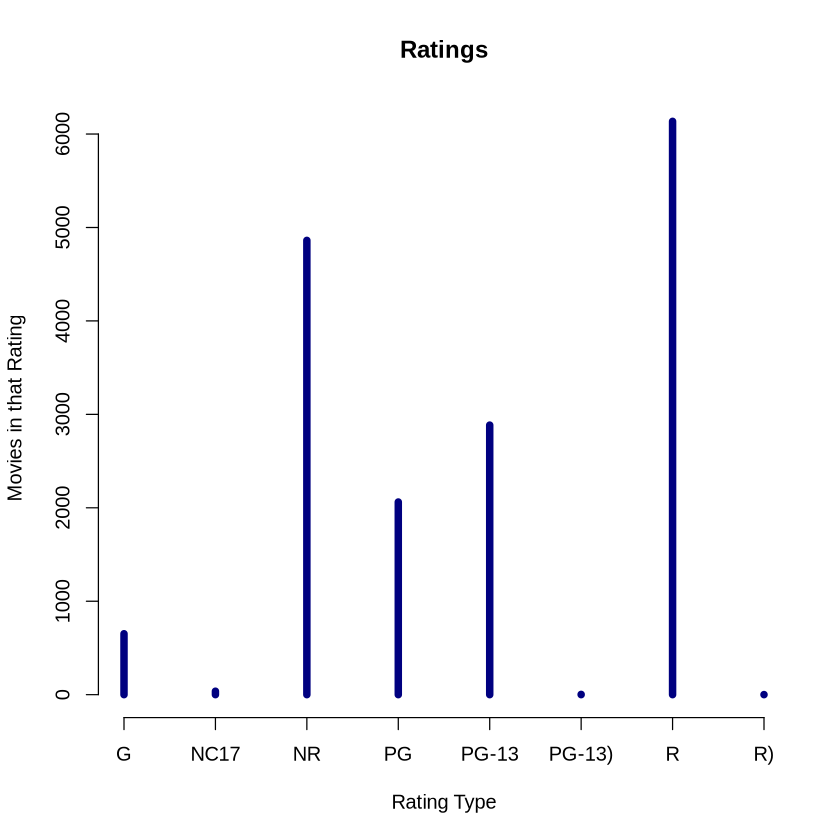

In [9]:
plot(table(myDF$rating), main="Ratings", xlab="Rating Type", ylab="Movies in that Rating", lw=6, col="navy")

I used Data Novia (link provided in the Examples book) to figure out how the color works and the HBC Training to figure out how the customization works

# Question 2

In [10]:
length(table(myDF$studio_name))

[1] 2887

In [11]:
length(table(myDF$rating))

[1] 8

In [12]:
length(table(myDF$directors))

[1] 8315

In [13]:
tail(sort(table(myDF$directors[myDF$directors != ""])))


Steven Soderbergh      Sidney Lumet  Steven Spielberg    Clint Eastwood 
               27                30                32                35 
 Alfred Hitchcock       Woody Allen 
               36                36 

The condition (myDF$directors != "") is so that you can't see the empty strings

In [14]:
tail(sort(table(myDF$studio_name[myDF$studio_name != ""])))


Sony Pictures Home Entertainment                        IFC Films 
                             379                              398 
                20th Century Fox               Universal Pictures 
                             414                              469 
           Warner Bros. Pictures               Paramount Pictures 
                             492                              497 

Woody Allen and Alfred Hitchcock have directed the most projects
Paramount Pictures has produced the most films

# Question 3

Listed below is the instances for Comedy

In [15]:
sum(myDF$genre == 'Comedy')

[1] 1202

In [16]:
length(myDF$genre[grepl("Comedy", myDF$genre) & (myDF$genre != "Comedy")])

[1] 4183

In [17]:
length(grep("Comedy", myDF$genre))

[1] 5385

Below is the instances for the Romance genre

In [18]:
sum(myDF$genre == 'Romance')

[1] 14

In [19]:
length(myDF$genre[grepl("Romance", myDF$genre) & (myDF$genre != "Romance")])

[1] 1793

In [20]:
length(grep("Romance", myDF$genre))

[1] 1807

Comedy and Drama had the most counts when excluding entries that were exclusively Comedy with a count of 819

In [23]:
tail(sort(table(myDF$genre[grepl("Comedy", myDF$genre) & (myDF$genre != "Comedy")])))


                   Comedy, Kids & Family 
                                     122 
              Action & Adventure, Comedy 
                                     169 
                         Comedy, Romance 
                                     257 
Art House & International, Comedy, Drama 
                                     260 
                  Comedy, Drama, Romance 
                                     294 
                           Comedy, Drama 
                                     819 

# Question 4

The table below is before the changes were made to make PG-13 and R look nicer

In [24]:
MyDF <- myDF[ , !names(myDF) %in% c("cast", "movie_info")]
table(MyDF$rating)


     G   NC17     NR     PG  PG-13 PG-13)      R     R) 
   652     37   4862   2062   2885      3   6136      1 

The command below makes the table columns for PG-13 and R look nicer

In [25]:
myDF$rating[myDF$rating == "R)"] <- "R"
myDF$rating[myDF$rating == "PG-13)"] <- "PG-13"

In [20]:
MyDF <- myDF[ , !names(myDF) %in% c("cast", "movie_info")]
table(MyDF$rating)


    G  NC17    NR    PG PG-13     R 
  652    37  4862  2062  2888  6137 

In [24]:
table(myDF$tomatometer_status)
table(myDF$rating)


Certified Fresh           Fresh          Rotten 
           2957            6448            7233 


    G  NC17    NR    PG PG-13     R 
  652    37  4862  2062  2888  6137 

In [5]:
table_data <- table(myDF$tomatometer_status, myDF$rating)

The table is composed of the TomatoMeter Status and the Ratings sections

In [45]:
table_data

                 
                     G NC17   NR   PG PG-13    R
  Certified Fresh  124    7  576  376   563 1311
  Fresh            336   19 3081  753   593 1666
  Rotten           192   11 1205  933  1732 3160

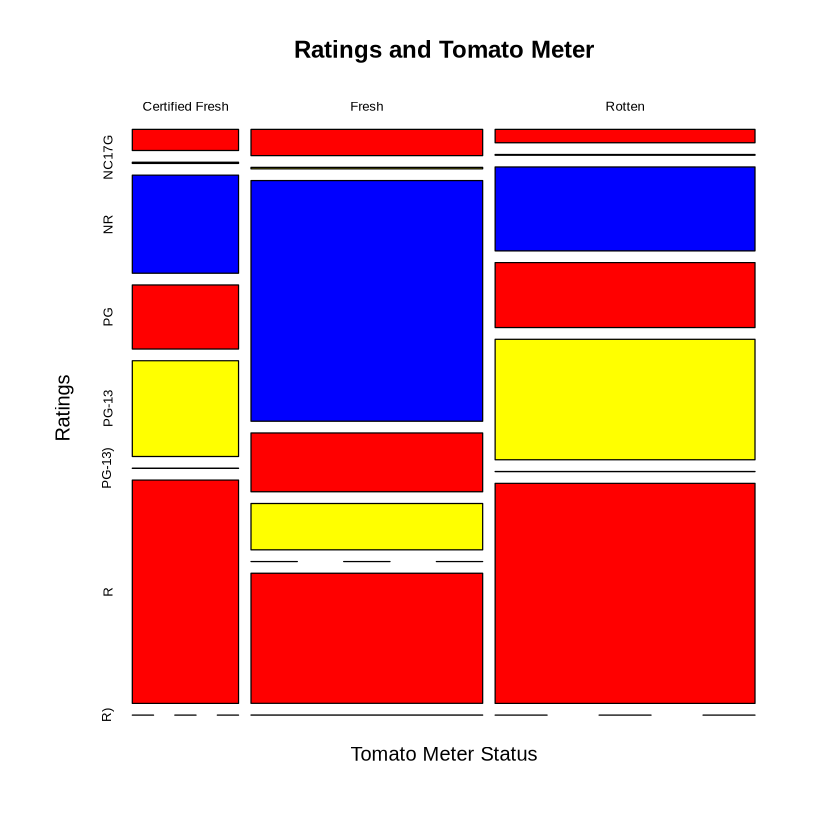

In [6]:
mosaicplot(table_data, main='Ratings and Tomato Meter', xlab='Tomato Meter Status', ylab='Ratings', color=c('red', 'yellow', 'blue'))

I used RDocumentation to figure out how to label the x and y axises of the Mosaic plot
I also used the link below to figure out how the coloring works (see Example 2 of website)

https://www.geeksforgeeks.org/r-language/mosaic-plot-in-r-programming

I find boxplots interesting because I am curious to see the spread, distribution, and outliers of the data. I also want to learn more about creating heatmaps because I am unfamiliar with reading them, so I want to be able to create them in R and learn how to read them as well.

# Question 5

In [79]:
Merged_Table <- paste(myDF$rating, myDF$tomatometer_status)
sort(table(Merged_Table))

Merged_Table
PG-13) Certified Fresh               R) Fresh          PG-13) Rotten 
                     1                      1                      2 
  NC17 Certified Fresh            NC17 Rotten             NC17 Fresh 
                     7                     11                     19 
     G Certified Fresh               G Rotten                G Fresh 
                   124                    192                    336 
    PG Certified Fresh  PG-13 Certified Fresh     NR Certified Fresh 
                   376                    562                    576 
           PG-13 Fresh               PG Fresh              PG Rotten 
                   593                    753                    933 
             NR Rotten      R Certified Fresh                R Fresh 
                  1205                   1311                   1665 
          PG-13 Rotten               NR Fresh               R Rotten 
                  1730                   3081                   3160 

R and Rotten has the highest count where the columns are pasted together

In [84]:
myDF <- myDF[ , !names(myDF) %in% c("cast", "movie_info")]
head(subset(myDF, rating=="PG" & tomatometer_status=="Certified Fresh"))

,rotten_tomatoes_link,movie_title,critics_consensus,poster_image_url,rating,genre,directors,writers,in_theaters_date,on_streaming_date,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
21,/m/1000355-adventures_of_robin_hood,The Adventures of Robin Hood,"Errol Flynn thrills as the legendary title character, and the film embodies the type of imaginative family adventure tailor-made for the silver screen.",https://resizing.flixster.com/6hiOJ5DDejxdFZXMqn8a8VazFgA=/206x305/v1.bTsxMTIwNzQ3MztqOzE4MzA5OzEyMDA7MTUzNjsyMDQ4,PG,"Action & Adventure, Classics, Romance","Michael Curtiz, William Keighley","Norman Reilly Raine, Seton I. Miller",1938-05-14,2003-09-30,...,Warner Bros.,Certified Fresh,100,46,Upright,89,33890,8,46,0
53,/m/1000626-all_about_eve,All About Eve,"Smart, sophisticated, and devastatingly funny, All About Eve is a Hollywood classic that only improves with age.",https://resizing.flixster.com/WSk7AjlfEuSjTrrQJIurnY2G6r8=/206x305/v1.bTsxMTIxMTMxNztqOzE4MzA5OzEyMDA7MTEyNTsxNTAw,PG,"Classics, Drama",Joseph L. Mankiewicz,Joseph L. Mankiewicz,1950-01-01,1999-10-05,...,20th Century Fox,Certified Fresh,100,67,Upright,94,45151,19,67,0
95,/m/10008507-deep_water,Deep Water,"Equal parts mystery and biography, Deep Water is both an engrossing documentary and an affecting treatise on human folly and obsession.",https://resizing.flixster.com/pEe0yCqqmqRnVGeG-6UE-g0i6MI=/206x305/v1.bTsxMTIxNjU0MjtqOzE4MzA5OzEyMDA7MTUzNjsyMDQ4,PG,"Documentary, Special Interest","Louise Osmond, Jerry Rothwell","Louise Osmond, Jerry Rothwell",2006-09-03,2007-12-18,...,IFC Films,Certified Fresh,96,55,Upright,87,4961,23,53,2
135,/m/10009001-the_freshman,The Freshman,"Buoyed by the charm of Matthew Broderick in the title role and Marlon Brando as a caricature of his Godfather persona, The Freshman benefits from solid casting, a clever premise, and sweet humor.",https://resizing.flixster.com/OfAdgch_GGkmfi3UmVeyW0OAC0Q=/206x305/v1.bTsxMTIwNzY1MztqOzE4MzA5OzEyMDA7MjEwMDsyODAw,PG,"Comedy, Drama",Andrew Bergman,Andrew Bergman,1990-07-20,1998-06-30,...,Sony Pictures Home Entertainment,Certified Fresh,93,46,Upright,61,11833,17,43,3
308,/m/1002352-big_sleep,The Big Sleep,"A perfect match of screenplay, director, and leading man, The Big Sleep stands as a towering achievement in film noir whose grim vitality remains undimmed.",https://resizing.flixster.com/cqTbTjRLxHPhaaNyWnhNG7jKk2o=/206x305/v1.bTsxMTE3MjY0NjtqOzE4MzA5OzEyMDA7ODAwOzEyMDA,PG,"Classics, Drama, Mystery & Suspense",Howard Hawks,"William Faulkner, Leigh Brackett, Jules Furthman",1946-08-31,2000-02-15,...,Warner Bros. Pictures,Certified Fresh,97,64,Upright,91,33461,12,62,2
340,/m/1003318-butch_cassidy_and_the_sundance_kid,Butch Cassidy and the Sundance Kid,"With its iconic pairing of Paul Newman and Robert Redford, jaunty screenplay and Burt Bacharach score, Butch Cassidy and the Sundance Kid has gone down as among the defining moments in late-'60s American cinema.",https://resizing.flixster.com/s2Jgsz5VrrWrqwSIoQuT8JMkQAQ=/206x305/v1.bTsxMTIwNzQ0ODtqOzE4MzA5OzEyMDA7OTAwOzEyMDA,PG,"Action & Adventure, Classics, Western",George Roy Hill,William Goldman,1969-10-24,2000-05-16,...,20th Century Fox,Certified Fresh,90,49,Upright,92,71088,8,44,5


In [7]:
subset(myDF, movie_title=='Zoo')
subset(myDF, movie_title=='Avatar')

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,⋯,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
16629,/m/zoo_2018,Zoo,"In 1941 marksmen from the Royal Ulster Constabulary, following a Directive from The Ministry of Public Security, shot dead 23 animals at Belfast Zoo. They destroyed one hyena, six wolves, one puma, one tiger, one black bear, one Barbary lion, two polar bears, one lynx and giant rat named Hugo. During these turbulent times, a woman secretly walked a young elephant from the zoo each evening to the backyard of her terraced home. There, she cared for and comforted it as the Luftwaffe bombs rained down over Belfast. This is a true story... and our setting for Zoo. Seen through the eyes of 10 year old Tom (Art Parkinson), aided and abetted by his misfit friends, this moving adventure unfolds as Tom takes on the fight to save Buster the elephant.",,https://resizing.flixster.com/pGFVmlv0TVmA0lea0_e5QEJYYo0=/206x305/v1.bTsxMjcyMjYwNDtqOzE4MjM3OzEyMDA7MjAyNTszMDAw,PG,"Action & Adventure, Kids & Family",Colin McIvor,Colin McIvor,"Art Parkinson, Penelope Wilton, Toby Jones, Amy Huberman, Ian McElhinney",⋯,Samuel Goldwyn Films,Fresh,88,17,Upright,62,120,3,15,2


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,⋯,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
2897,/m/avatar,Avatar,"""Avatar"" is the story of an ex-Marine who finds himself thrust into hostilities on an alien planet filled with exotic life forms. As an Avatar, a human mind in an alien body, he finds himself torn between two worlds, in a desperate fight for his own survival and that of the indigenous people.","It might be more impressive on a technical level than as a piece of storytelling, but Avatar reaffirms James Cameron's singular gift for imaginative, absorbing filmmaking.",https://resizing.flixster.com/gNxUmwpTWl2_Q5z5BcsKKpIB9Rk=/206x305/v1.bTsxMTE3Njc5MjtqOzE4MzA5OzEyMDA7ODAwOzEyMDA,PG-13,"Action & Adventure, Comedy, Mystery & Suspense, Science Fiction & Fantasy",James Cameron,James Cameron,"Zoe Saldana, Sam Worthington, Sigourney Weaver, Stephen Lang, Michelle Rodriguez, Giovanni Ribisi, Joel David Moore, CCH Pounder, Wes Studi, Laz Alonso, Dileep Rao, Matt Gerald, Sean Anthony Moran, Jason Whyte, Scott Lawrence, Kelly Kilgour, James Pitt, Sean Patrick Murphy, Peter Michael Dillon, Kevin Dorman, Kelson Henderson, David Van Horn, Jacob Tomuri, Michael Blain-Rozgay, Jon Curry, Julene Renee, Luke Hawker, Woody Schultz, Peter Mensah, Sonia Yee, Jahnel Curfman, Ilram Choi, Kyla Warren, James Horner",⋯,20th Century Fox,Certified Fresh,82,308,Upright,82,1381988,57,252,56


The movies I chose are The Zoo and Avatar